# 2.1 Analisi generali dei dati della blockchain

Per la prima parte del progetto, sono richieste delle analisi sulle transazioni e sui blocchi della blockchain.
Dunque , ho importato il DataFrame delle transazioni , associato i vari nomi alle colonne (secondo quando riportato nel paragrafo  **1.Descrizione del DataSet** , della descrizione del progetto), e convertito i valori della colonna `timestamp`, in oggetti datetime pandas, per rendere più semplice le successivi analisi

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

df_transactions=pd.read_csv("2013/transactions.csv",names=["timestamp","blockId","txId","isCoinbase","fee"])
df_transactions["timestamp"]=pd.to_datetime(df_transactions["timestamp"],unit='s')

df_transactions.head()

,timestamp,blockId,txId,isCoinbase,fee
0,2009-01-09 03:54:39,9,9,1,0
1,2009-01-11 01:00:54,78,78,1,0
2,2009-01-12 03:30:25,170,171,0,0
3,2009-01-12 06:02:13,181,183,0,0
4,2009-01-12 06:12:16,182,185,0,0


## distribuzione del numero di transazioni per blocco (occupazione del blocco), nell’intero periodo temporale considerato

Per effettuare l'analisi richiesta , ho calcolato il numero di occorrenze di ciascun blocco ,all'interno del DataFrame della transazioni , producendo una Series contenente i vari risultati

In [2]:
series_blocks_occurrences=df_transactions['blockId'].value_counts()
series_blocks_occurrences

blockId
191716    1871
193271    1852
193645    1836
191652    1833
194208    1798
          ... 
68244        1
68242        1
68240        1
68238        1
123909       1
Name: count, Length: 181089, dtype: int64

Successivamente, per avere una rappresentazione grafica dell'analisi effettuata, ho scelto di utilizzare l'istogramma , come tipologia di plotting (scala logaritmica)

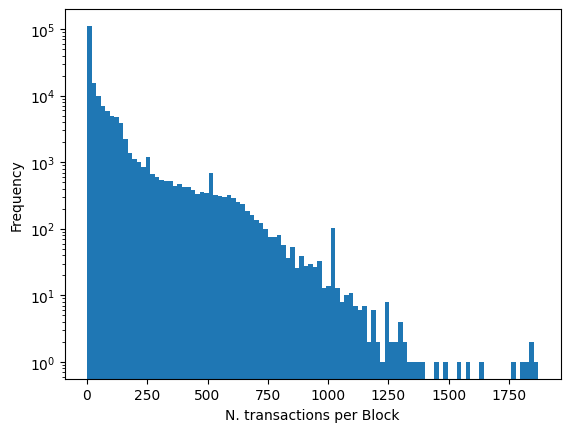

In [3]:
#plt.hist(series_blocks_occurrences.values,bins=100,range=(0,800))
plt.hist(series_blocks_occurrences.values,bins=100,log=True)
plt.ylabel("Frequency")
plt.xlabel("N. transactions per Block")

plt.show()

Osservando il grafico prodotto, si nota che la maggior parte dei blocchi della blockchain, non contengono piu di 50 transazioni

## evoluzione dell'occupazione dei blocchi nel tempo, considerando intervalli temporali di due mesi. In questo caso produrre un grafico che riporti il numero di transazioni medie per ogni periodo considerato

Per effettuare l'analisi richiesta , ho aggiunto per ciascuna transazione (all'interno del DataFrame delle transazioni) il campo `year` , che rappresenta l'anno in cui è avvenuta la transazione

In [4]:
import numpy as np

### 1)
df_transactions['year']=df_transactions['timestamp'].dt.year
df_transactions

,timestamp,blockId,txId,isCoinbase,fee,year
0,2009-01-09 03:54:39,9,9,1,0,2009
1,2009-01-11 01:00:54,78,78,1,0,2009
2,2009-01-12 03:30:25,170,171,0,0,2009
3,2009-01-12 06:02:13,181,183,0,0,2009
4,2009-01-12 06:12:16,182,185,0,0,2009
...,...,...,...,...,...,...
10532110,2012-12-31 23:52:37,214562,10572822,0,100000,2012
10532111,2012-12-31 23:52:37,214562,10572823,0,100000,2012
10532112,2012-12-31 23:52:37,214562,10572824,0,100000,2012
10532113,2012-12-31 23:52:37,214562,10572825,0,100000,2012


Successivamente, ho  effettuato  una `groupby` per coppia (mese,anno), contando il numero di transazioni in ciascun blocco, in quel periodo

In [5]:
### 2) 

year_month_mask=[df_transactions['timestamp'].dt.month,df_transactions['year']]

df_grouped_transactions=df_transactions.groupby(year_month_mask)['blockId'].value_counts().reset_index()
df_grouped_transactions.columns=['month_number','year','blockId','n.transactions']

df_grouped_transactions

,month_number,year,blockId,n.transactions
0,1,2009,546,3
1,1,2009,1967,2
2,1,2009,2518,2
3,1,2009,728,2
4,1,2009,707,2
...,...,...,...,...
181084,12,2012,212328,1
181085,12,2012,212338,1
181086,12,2012,211843,1
181087,12,2012,212204,1


Dopo di che, ho calcolato la media di transazioni per blocco, nell'intervallo temporale di  due mesi consecutivi, per tutti gli anni dal 2009 al 2012

In [6]:
### 3)

### Per poter raggruppare le transazioni in un intervallo di due mesi consecutivi,
### ho utilizzato la floor division, per mappare ciascuna coppia di mesi a un "gruppo" specifico
### Es:  0(Jan) // 2 = 0  ,  1(Feb) // 2 = 0
### Es:  2(Mar) // 2 = 1  ,  3(Apr) // 2 = 1

two_month_interval_mask=[df_grouped_transactions.month_number // 2,df_grouped_transactions.year]


df_avg_transactions=df_grouped_transactions.groupby(two_month_interval_mask)['n.transactions'].mean().reset_index()


df_avg_transactions.columns=['months_group','year','avg']
df_avg_transactions

,months_group,year,avg
0,0,2009,1.024658
1,0,2010,1.011524
2,0,2011,6.805808
3,0,2012,42.125843
4,1,2009,1.018233
5,1,2010,1.033346
6,1,2011,12.599125
7,1,2012,46.008048
8,2,2009,1.006549
9,2,2010,1.587792


In fine, per avere una rappresentazione grafica intuitiva dell'analisi effettuata , ho utilizzato un grouped bar plot, dove per ciascun anno , si rappresenta il numero di transazioni medie , per coppia di mesi conseguitivi

Text(0.5, 0, 'Years')

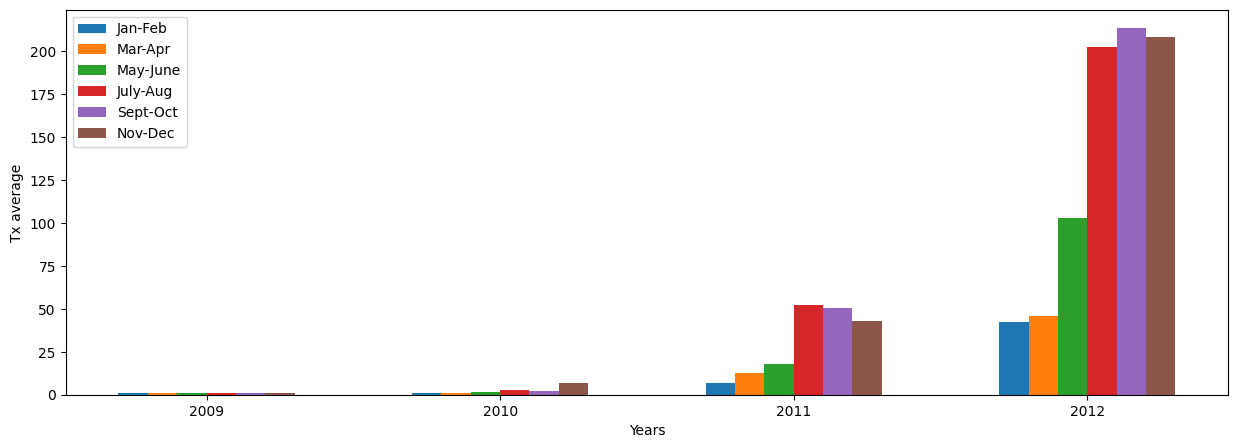

In [7]:
### 4)

years=[ 2009 , 2010 , 2011 , 2012 ]
months=[ 'Jan-Feb' , 'Mar-Apr' , 'May-June' , 'July-Aug' , 'Sept-Oct' , 'Nov-Dec' ];
width=0.1
x_ind=np.arange(len(years))

fig, ax = plt.subplots(figsize=(15,5))

### Restituisce una Series contenente il numero di transazioni medie per blocco , in due mesi contigui specifici (eg: Jan-Feb),
### per ogni anno dal 2009 al 2012
def compute_months_group_tx_mean(months_group):
    res=df_avg_transactions[ df_avg_transactions.months_group == months_group ]
    return res['avg']


rects1=ax.bar( x_ind+(1.5*width) , compute_months_group_tx_mean(0) , width , label = months[0] )
rects2=ax.bar( x_ind+(2.5*width) , compute_months_group_tx_mean(1) , width , label = months[1] )
rects3=ax.bar( x_ind+(3.5*width) , compute_months_group_tx_mean(2) , width , label = months[2] )
rects4=ax.bar( x_ind+(4.5*width) , compute_months_group_tx_mean(3) , width , label = months[3] )
rects5=ax.bar( x_ind+(5.5*width) , compute_months_group_tx_mean(4) , width , label = months[4] )
rects6=ax.bar( x_ind+(6.5*width) , compute_months_group_tx_mean(5) , width , label = months[5] )


ax.set_xticks([r + width * 4 for r in range(len(years))],years)


### Le label non sono state inserite in quanto comprometterebbero la leggibilità del plot 

"""
ax.bar_label(rects1,padding=0,label_type='center')
ax.bar_label(rects2,label_type='center',padding=5)
ax.bar_label(rects3,padding=6,label_type='center')
ax.bar_label(rects4,padding=8,label_type='center')
ax.bar_label(rects5,padding=0,label_type='center')
ax.bar_label(rects6,label_type='center')
"""

ax.legend()
ax.set_ylabel('Tx average')
ax.set_xlabel('Years')

## ammontare totale degli UTXO al momento dell’ultima transazione registrata nella blockchain considerata

Per effettuare l'analisi richiesta, ho aggiunto il campo `output_id`, calcolato come la concatenazione del campo `prevTxId`  e `prevTxPos` , nel Data Frame `Inputs` , e nel Data Frame `Outputs` , calcolato come concatenazione del campo `txId` e `position`.
Questo ha permesso di semplificare le operazioni successive.


In [8]:
Inputs=pd.read_csv("2013/inputs.csv",names=["txId","prevTxId","prevTxPos"])
Outputs=pd.read_csv("2013/outputs.csv",names=["txId","position","addressId","amount","scripType"])

# associo ad ogni input un id che identifica l'output che utilizza
#Inputs['output_id']=Inputs['prevTxId'].astype(str)+Inputs['prevTxPos'].astype(str)

### associo ad ogni output un id che semplifica le operazioni di merging e di join , con il Data Frame Input
#Outputs['output_id']=Outputs['txId'].astype(str)+Outputs['position'].astype(str)

print(Inputs.head())
print(Outputs.head())

   txId  prevTxId  prevTxPos
0   171         9          0
1   183       171          1
2   185       183          1
3   187       185          1
4   192       187          0
   txId  position  addressId      amount  scripType
0     9         0          9  5000000000          1
1    78         0         78  5000000000          1
2   171         0        171  1000000000          1
3   171         1          9  4000000000          1
4   183         0        183  1000000000          1


Successivamente , ho cercato tutti gli output che non sono utilizzati come input in una transazione (UTXO)

In [9]:
merged_df=pd.merge(Outputs,Inputs,left_on=['txId','position'],right_on=['prevTxId','prevTxPos'],indicator=True,how='left')

In [10]:
missing_fk_rows = merged_df[merged_df['_merge'] == 'left_only']

missing_fk_rows

,txId_x,position,addressId,amount,scripType,txId_y,prevTxId,prevTxPos,_merge
4,183,0,183,1000000000,1,NaN,NaN,NaN,left_only
11,227,0,227,100000000,1,NaN,NaN,NaN,left_only
14,255,1,9,1800000000,1,NaN,NaN,NaN,left_only
41,504,0,504,6100000000,1,NaN,NaN,NaN,left_only
48,533,1,293,2500000000,1,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
24573066,10572825,0,8707915,1,2,NaN,NaN,NaN,left_only
24573067,10572825,1,6137715,9899999,2,NaN,NaN,NaN,left_only
24573068,10572826,0,8707915,26651306,2,NaN,NaN,NaN,left_only
24573069,10572826,1,6137711,7991620447,2,NaN,NaN,NaN,left_only


Dopo di che , ho calcolato l'ammontare totale degli UTXO , effettuando la somma di tutti gli  `amount` , degli output individuati

In [12]:
total_UTXO=missing_fk_rows['amount'].sum()

print(f"ammontare totale degli UTXO: {total_UTXO}")

ammontare totale degli UTXO: 859303372614879


## distribuzione degli intervalli di tempo che intercorrono tra la transazione che genera un valore in output (UTXO) e quella che lo consuma, per gli output spesi nel periodo considerato.

Per effettuare l'analisi richiesta ,  ho rimosso tutti gli output che non vengono spesi come input in nessuna transazione (UTXO), per rendere più piccolo il DataFrame e facilitarne l'analisi

In [35]:
merged_df_utxo=pd.merge(Outputs,Inputs,left_on=['txId','position'],right_on=['prevTxId','prevTxPos'],how='inner')
merged_df_utxo.drop(columns=['scripType','prevTxId','prevTxPos'],inplace=True) 
merged_df_utxo.columns=['txId_produced','position','addressId','amount','txId_consumed']
merged_df_utxo

,txId_produced,position,addressId,amount,txId_consumed
0,9,0,9,5000000000,171
1,78,0,78,5000000000,724715
2,171,0,171,1000000000,156739
3,171,1,9,4000000000,183
4,183,1,9,3000000000,185
...,...,...,...,...,...
21378765,10572820,3,3534212,10000000,10572821
21378766,10572820,4,3535501,10000000,10572822
21378767,10572820,5,3525822,10000000,10572824
21378768,10572820,6,3517234,10000000,10572825


In seguito, ho  effettuato il merging del DataFrame ottenuto con il DataFrame `df_transactions`, per ottenere le date in cui sono stati prodotti gli UTXO

In [36]:
df_produced_date_utxo=merged_df_utxo.merge(df_transactions[['txId','timestamp']],left_on='txId_produced',right_on='txId',how='inner')
df_produced_date_utxo.drop(columns=['txId'],inplace=True)
df_produced_date_utxo.rename(columns={'timestamp':'produced_timestamp'},inplace=True)
df_produced_date_utxo

,txId_produced,position,addressId,amount,txId_consumed,produced_timestamp
0,9,0,9,5000000000,171,2009-01-09 03:54:39
1,78,0,78,5000000000,724715,2009-01-11 01:00:54
2,171,0,171,1000000000,156739,2009-01-12 03:30:25
3,171,1,9,4000000000,183,2009-01-12 03:30:25
4,183,1,9,3000000000,185,2009-01-12 06:02:13
...,...,...,...,...,...,...
21378765,10572820,3,3534212,10000000,10572821,2012-12-31 23:52:37
21378766,10572820,4,3535501,10000000,10572822,2012-12-31 23:52:37
21378767,10572820,5,3525822,10000000,10572824,2012-12-31 23:52:37
21378768,10572820,6,3517234,10000000,10572825,2012-12-31 23:52:37


Dopo di che, ho effettuato il merging del DataFrame ottenuto , con il DataFrame `df_transactions`, per ottenere le date in cui sono stati spesi gli UTXO

In [37]:
df_consumed_date_utxo=df_produced_date_utxo.merge(df_transactions[['txId','timestamp']],left_on='txId_consumed',right_on='txId',how='inner')
df_consumed_date_utxo=df_consumed_date_utxo.drop(columns=['txId'])### Campo ridontante quindi lo elimino
df_consumed_date_utxo.rename(columns={'timestamp':'consumed_timestamp'},inplace=True)

df_consumed_date_utxo.head()

### txId_produced si riferisce all' id della transazione che ha generato l' UTXO
### txId_consumed si riferisce all' id della transazione che ha speso l' UTXO

,txId_produced,position,addressId,amount,txId_consumed,produced_timestamp,consumed_timestamp
0,9,0,9,5000000000,171,2009-01-09 03:54:39,2009-01-12 03:30:25
1,78,0,78,5000000000,724715,2009-01-11 01:00:54,2011-06-14 05:22:23
2,368,0,368,5000000000,724715,2009-01-13 18:57:05,2011-06-14 05:22:23
3,745,0,743,5000000000,724715,2009-01-16 19:18:35,2011-06-14 05:22:23
4,795,0,793,5000000000,724715,2009-01-17 05:59:08,2011-06-14 05:22:23


In fine , ho calcolato il tempo che intercorre tra `produced_date` e `consumed_date` (in numero di giorni) , per ciascun UTXO, 

In [38]:
df_consumed_date_utxo['diff_days'] = (df_consumed_date_utxo['consumed_timestamp'] - df_consumed_date_utxo['produced_timestamp']) / np.timedelta64(1, 'D')

df_consumed_date_utxo['diff_days']=df_consumed_date_utxo['diff_days'].astype(int)

df_consumed_date_utxo.head()

,txId_produced,position,addressId,amount,txId_consumed,produced_timestamp,consumed_timestamp,diff_days
0,9,0,9,5000000000,171,2009-01-09 03:54:39,2009-01-12 03:30:25,2
1,78,0,78,5000000000,724715,2009-01-11 01:00:54,2011-06-14 05:22:23,884
2,368,0,368,5000000000,724715,2009-01-13 18:57:05,2011-06-14 05:22:23,881
3,745,0,743,5000000000,724715,2009-01-16 19:18:35,2011-06-14 05:22:23,878
4,795,0,793,5000000000,724715,2009-01-17 05:59:08,2011-06-14 05:22:23,877


Per avere una visualizzazione grafica dell'analisi effettuata ,  ho utilizzato l'istogramma, che permette di dare un'idea intuitiva , degli intervalli di tempo , che intercorrono tra la creazione di un output e il suo utilizzo come input in una transazione

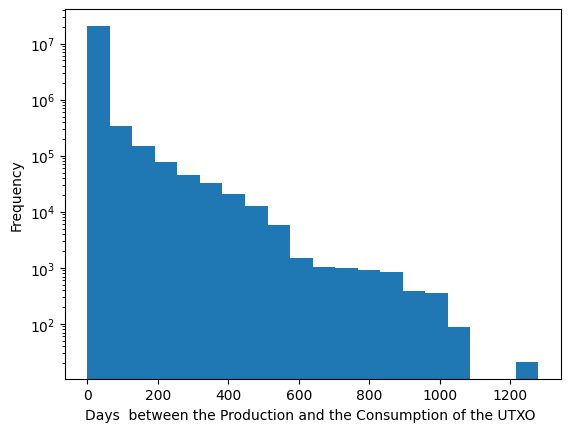

In [39]:
plt.hist(df_consumed_date_utxo.diff_days,bins=20,log=True) # bins=20
plt.ylabel("Frequency")
plt.xlabel("Days  between the Production and the Consumption of the UTXO ")

plt.show()

Osservando il grafico , si nota che la maggior parte degli UTXO sono stati spesi in al massimo 50 giorni dalla loro creazione

## Analisi a scelta: Distribuzione del Volume delle transazioni nell'intero periodo

Per realizzare l'analisi proposta, ho effettuato un `groupby` sul Data Frame `Outputs` , effettuando la somma di tutti gli amount, prodotti da ciascuna transazione

In [40]:
Output_values=Outputs.groupby(Outputs['txId'])['amount'].sum().reset_index()
Output_values.columns=['txId','amount']
Output_values.head()

,txId,amount
0,9,5000000000
1,78,5000000000
2,171,5000000000
3,183,4000000000
4,185,3000000000


Successivamente , ho effettuato il merging con il DataFrame `df_transactions`, per associare a ciascuna transazione la data in cui è avvenuta 

In [41]:
df_transactions_timestamp=Output_values.merge(df_transactions[['txId','timestamp']],on='txId')

df_transactions_timestamp.sort_values(by='timestamp', inplace=True)
df_transactions_timestamp

,txId,amount,timestamp
0,9,5000000000,2009-01-09 03:54:39
1,78,5000000000,2009-01-11 01:00:54
2,171,5000000000,2009-01-12 03:30:25
3,183,4000000000,2009-01-12 06:02:13
4,185,3000000000,2009-01-12 06:12:16
...,...,...,...
10531946,10572658,10610522,2012-12-31 23:52:37
10531947,10572659,281789250,2012-12-31 23:52:37
10531948,10572660,27332499,2012-12-31 23:52:37
10531951,10572663,780240000,2012-12-31 23:52:37


In fine, per  avere una visualizzazione grafica della distribuzione dei volumi delle transazioni , nell'intero periodo (2009-2012) , ho utilizzato un line plot , dove sull'asse delle X sono riportati range di date (sull'intero periodo considerato), e sull'asse delle Y sono riportati i volumi delle transazioni

Text(0, 0.5, 'Transaction Volume')

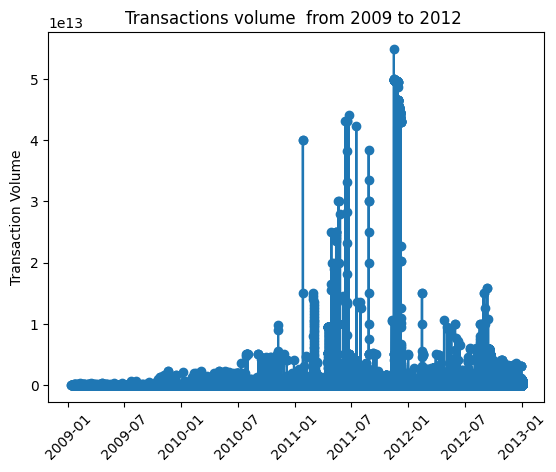

In [42]:
plt.plot(df_transactions_timestamp['timestamp'], df_transactions_timestamp['amount'], marker='o')
plt.xticks(rotation=45)
plt.title("Transactions volume  from 2009 to 2012 ")
plt.ylabel("Transaction Volume")


Osservando il grafico , si nota che fino al 2011-01 abbiamo avuto transazioni con un volume "regolare", mentre dal 2011-01, abbiamo iniziato ad avere una forte oscillazione del volume delle transazioni.

# 2.2 Clusterizzazione degli indirizzi di Bitcoin: euristica multi-input

Per realizzare questa parte del progetto, ho importato i DataSet degli inputs e degli outputs, assegnando i nomi alle colonne e aggiungendo il campo `output_id`, come effettuato per la prima parte del progetto 

In [43]:
import pandas as pd
import numpy as np
import networkx as nx

Inputs=pd.read_csv("2013/inputs.csv",names=["txId","prevTxId","prevTxPos"])
Outputs=pd.read_csv("2013/outputs.csv",names=["txId","position","addressId","amount","scripType"])

# associo ad ogni input un id che identifica l'output che utilizza
#Inputs['output_id']=Inputs['prevTxId'].astype(str)+Inputs['prevTxPos'].astype(str)

### associo ad ogni output un id che semplifica le operazioni di merging e di join con il Data Frame Input
#Outputs['output_id']=Outputs['txId'].astype(str)+Outputs['position'].astype(str)

print(Inputs.head())
print(Outputs.head())

   txId  prevTxId  prevTxPos
0   171         9          0
1   183       171          1
2   185       183          1
3   187       185          1
4   192       187          0
   txId  position  addressId      amount  scripType
0     9         0          9  5000000000          1
1    78         0         78  5000000000          1
2   171         0        171  1000000000          1
3   171         1          9  4000000000          1
4   183         0        183  1000000000          1


Successivamente , ho inserito tutti gli id delle transazioni, presenti nel DataFrame `Inputs`, in un `set` python

In [44]:
transactions=set(Inputs['txId'].values)

Dopo di che , ho effettuato il merging del DataFrame `Inputs` con il DataFrame `Outputs` , per ottenere gli `addressId` dei vari input utilizzati nelle transazioni

In [45]:
df_inputs_address=Inputs.merge(Outputs,left_on=['prevTxId','prevTxPos'],right_on=['txId','position'],how='inner')
df_inputs_address.drop(columns=['txId_y','prevTxPos','prevTxId'],inplace=True)
df_inputs_address.rename(columns={'txId_x':'txId'},inplace=True)
df_inputs_address.set_index('txId',inplace=True)

df_inputs_address

,position,addressId,amount,scripType
txId,,,,
171,0,9,5000000000,1
183,1,9,4000000000,1
185,1,9,3000000000,1
187,1,9,2900000000,1
192,0,187,100000000,1
...,...,...,...,...
10572823,7,3526385,10000000,2
10572824,5,3525822,10000000,2
10572825,6,3517234,10000000,2


Successivamente , ho creato un grafo ,utilizzando la libreria `networkx`, e aggiunto tutti gli `addressId` ,presenti nel DataFrame ottenuto precedentemente, come nodi nel grafo

In [46]:
addresses=set(df_inputs_address['addressId'].values)

G=nx.DiGraph()
G.add_nodes_from(addresses)

**Nota**: per visualizzare le varie progress bar utilizzate nel notebook, è necessario installare il package `tqdm` , tramite l'esecuzione della seguente cella 

In [47]:
pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Per rendere più veloce l'accesso, agli input utilizzati in una certa transazione , ho utilizzato un `HashMap` , che associa a ciascuna transazione ,la lista di tutti gli `addressId` degli input utilizzati.

In [48]:
from collections import defaultdict
from tqdm import tqdm

num_inputs=len(df_inputs_address.reset_index()['txId'])

progress_bar=tqdm(total=num_inputs,desc="Costruzione HashMap")

transactions_inputs=defaultdict(list)

for row in df_inputs_address.itertuples(index=True):
    txId=row[0]
    addressId=row[2]#row[4]
    transactions_inputs[txId].append(addressId) # aggiungo *addressId* alla lista degli input utilizzati nella transazione *txId*
    progress_bar.update(1)
    
progress_bar.close()

Costruzione HashMap: 100%|██████████| 21378770/21378770 [00:41<00:00, 509965.75it/s] 


Dopo di che , per ciascuna transazione all'interno del set `transactions`, ho creato un'arco nel grafo , tra il primo input e tutti gli input della medesima transazione

In [49]:
for txId in tqdm(transactions):

    transaction_inputs=transactions_inputs[txId]
    
    if len(transaction_inputs)<=1: # se la transazione ha un solo input , passo alla successiva
        continue
    
    first_input=transaction_inputs[0]   

    edges = [(first_input, inp) for inp in transaction_inputs[1:]]
    G.add_edges_from(edges)

  0%|          | 0/10358266 [00:00<?, ?it/s]

100%|██████████| 10358266/10358266 [00:27<00:00, 378835.35it/s]


In [50]:
print(f"Numero nodi:{G.number_of_nodes()}")
print(f"Numero archi:{G.number_of_edges()}")

Numero nodi:7910147
Numero archi:4798358


La seguente cella permette di disegnare il grafo costruito , ma date le dimensione del grafo, richiede troppo tempo

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")

plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

Per la creazione dei cluster , ho generato una lista delle *weakly_connected_components* (con ordine *larger first*)

In [51]:
clusters=sorted(nx.weakly_connected_components(G), key=len, reverse=True)

Successivamente ,  ho calcolato la dimensione di ciascun cluster

In [52]:
cluster_sizes=[len(c) for c in clusters]

In [53]:
print(f"Dimensione massima cluster: {cluster_sizes[0]}")
print(f"Dimensione minima cluster: {cluster_sizes[len(cluster_sizes)-1]}")
print(f"Dimensione media cluster: {np.mean(cluster_sizes)}")

Dimensione massima cluster: 259773
Dimensione minima cluster: 1
Dimensione media cluster: 1.9765781096168358


Dopo di che , ho utilizzato un `Box plot`,  per rappresentare la distribuzione della dimensione dei cluster.

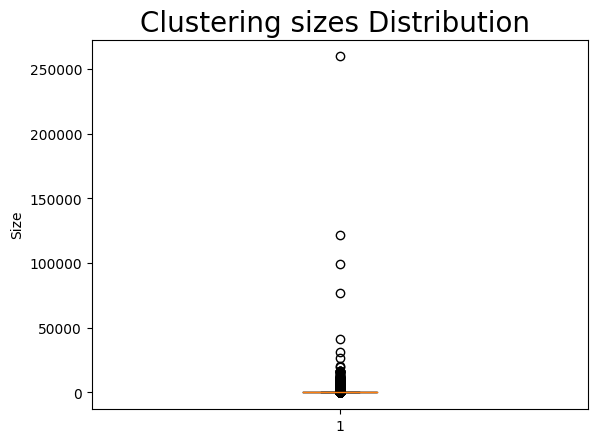

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(cluster_sizes)
plt.title("Clustering sizes Distribution ", fontdict={"size": 20}, loc="center")
plt.ylabel('Size')
plt.show()

Il grafico mostra che la maggior parte dei cluster hanno pochi indirizzi (~1), mentre alcuni cluster hanno un numero molto maggiore di indirizzi ( max 2299094)

# 2.3 Deanonimizzazione degli indirizzi

Per effettuare la deanonimizzazione degli indirizzi , ho per prima cosa importato il DataSet `mapAddr`, che  contiene l'associazione addressId - indirizzo bitcoin, per tutti gli addressId presenti nel DataSet

In [55]:
import pandas as pd
df_mapping=pd.read_csv('./2013/mapAddr2Ids8708820.csv',names=['hash','addressId'],index_col='addressId')
df_mapping

,hash
addressId,
0,1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa
1,12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX
2,1HLoD9E4SDFFPDiYfNYnkBLQ85Y51J3Zb1
3,1FvzCLoTPGANNjWoUo6jUGuAG3wg1w4YjR
4,15ubicBBWFnvoZLT7GiU2qxjRaKJPdkDMG
...,...
8708816,13dJEWNK55L5Zbh8ZVqpvmpritkEYHD1nE
8708817,1GA1vXcj4UMwcgr7nBftkpxXE6RrBwwm2M
8708818,1DrJbVsNJDweTQgKAwrBNyKuvtFBS6iKNK


Successivamente , ho estratto i 10 cluster di dimensione maggiore, dall'insieme di cluster ottenuti precedentemente

In [56]:
top_10_clusters=clusters[0:10]

Ho salvato i dati dei primi 10 cluster in un file binario , utilizzando la libreria `pickle`, per evitare di dover effettuare nuovamente  i passaggi per la creazione del grafo e la creazione dei cluster , ogni qualvolta venga chiuso il notebook o vengano eliminati i checkpoints di jupyter

In [57]:
import pickle
file_path = "./top_10_clusters.dat"

with open(file_path, "wb") as file:
    pickle.dump(top_10_clusters, file)

L'esecuzione della seguente cella di codice, permette la lettura del file, contenente i *top_10_clusters*

In [2]:
import pickle

file_path = "./top_10_clusters.dat"
with open(file_path, "rb") as file:
    top_10_clusters = pickle.load(file)

Per cercare di deanonimizzare gli indirizzi contenuti nei cluster , ho utilizzato i servizi `walletexplorer.com` e `bitinfocharts.com`

In [61]:
import requests
import time
from bs4 import BeautifulSoup

Per ricercare informazioni su un certo indirizzo , utilizzando il servizio `walletexplorer.com`,
ho analizzato  la pagina web da browser , per cercare di capire come veniva effettuata la ricerca. 

Ho osservato che , per effettuare la ricerca di informazioni su un certo indirizzo, dobbiamo:

- Inserire l'indirizzo di cui vogliamo ottenere informazioni, nell'apposita input box

- Cliccare il pulsante `Search` 

![alternative text](./public/walletExplorerHomePage.png)

Analizzando la tab `Network`, ho osservato che , una volta effettuato il submit della form, viene effettuata  una richiesta HTTP all'url https://www.walletexplorer.com, impostando un query parameter contenente l'indirizzo inserito precedentemente:

![alternative text](./public/netwrorkTab.png)

Quindi per effettuare lo scraping di informazioni da `walletexplorer.com` , ho creato un url di questa forma :
<p align="center">https://www.walletexplorer.com?q=[address]</p>

e effettuato una richiesta HTTP per ciascun indirizzo nei vari cluster , per tutti i cluster presenti in `top_10_clusters`.


Mentre per ricercare informazioni su un certo indirizzo , utilizzando il servizio `bitinfocharts.com` , basta effettuare una richiesta HTTP al seguente url:
    <p align="center">https://bitinfocharts.com/bitcoin/address/[address]</p>

Come riportato nella descrizione del progetto.



Dato che `walletexplorer.com` e `bitinfocharts.com`  applicano tecniche di rate limiting delle richieste HTTP, per cercare di contrastare  il più possibile le restrizioni anti-scraping  e ridurre il tempo di attesa ,a causa di un blocco temporaneo delle richieste , ho applicato diverse  metodologie:

- **Random user agent**: Utilizzando la libreria `fake_useragent` per generare in maniera random  stringhe `user agent` ,che permettono di simulare l'origine delle richieste da diversi browser, sistemi operativi o dispositivi. Ciò può aiutare nel prevenire il rilevamento dal parte del server

- **Randomizzazione delle richieste**: Si varia il tempo di attesa tra una richiesta e la successiva , per farle sembrare più "naturali" e non un processo automatizzato (nell'implementazione ho utilizzato la libreria `random` , per generare il numero di secondi di attesa, che possono essere 1-6 secondi )

- **Sospensione delle richieste in caso di applicazione del rate limiting**: Ovvero, nel caso in cui a seguito di una richiesta HTTP , venga restituito lo status code `429` (`To many requests`) o `403` (`Forbidden`), si attende un tempo che varia tra i 30 e i 120 secondi, prima di riprovare a effettuare nuovamente la richiesta HTTP

**Nota**: Eseguire la successiva cella per installare il package `fake-useragent`

In [20]:
pip install fake-useragent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
import random
from fake_useragent import UserAgent

user_agent=UserAgent()

### Dato un indirizzo bitcoin, utilizzando il servizi `walletexplorer.com` e `bitinfocharts.com`,
### restituisce una lista contenente il le informazioni sull'indirizzo: il primo elemento è il risultato 
### di `walletexplorer.com` e il secondo elemento è il risultato di `bitinfocharts.com`
  

def extract_address_info(btc_address):

    def fetch_info(url):
        while True:
            
            headers = {"User-Agent": user_agent.random}
            res = requests.get(url, headers=headers)

            if res.status_code == 429 or res.status_code == 403:  # To many requests
                print('To many requests: waiting maximum 2 minutes...')
                time.sleep(random.randint(30, 120))
                
            elif res.status_code != 200:  # Error
                print(res.status_code, res.text)
                raise Exception(
                    "An error occurred while fetching address info")
            
            else:  # Success
                return res.text

    def scraping_from_wallet_explorer():
        base_url = "https://www.walletexplorer.com"

        def extract_links(dest_dict, soup):
            details_span = soup.find("span", {"class": "showother"})
            links = details_span.find_all("a")
            
            if links == None: # Nessun link
                return
            
            if len(links) == 1: # un solo link (link alla pagina del wallet in cui è contenuto l'indirizzo *btc_address*)
                dest_dict['link_to_wallet_addresses'] = base_url + \
                    links[0]['href']

            else: # due link (link alla pagina del wallet e link alla pagina del servizio)
                dest_dict['link_to_service'] = links[0]['href']
                dest_dict['link_to_wallet_addresses'] = base_url + \
                    links[1]['href']

        response_page = fetch_info(url=f"{base_url}/?q={btc_address}")
        soup = BeautifulSoup(response_page, "html.parser")

        # Controllo eventuali messaggi di errori durante il fetching
        error_box = soup.find("p", {"class": "error"})
        
        if error_box != None: 
            raise Exception(f"Errore: {error_box.get_text()}")
        
        result = dict()
        result['address_hash'] = btc_address
        result["wallet_owner"] = soup.find("h2").get_text().split(" ")[1]
        extract_links(result, soup)

        return result

    def scraping_from_bitcoin_info():
        base_url = "https://bitinfocharts.com/bitcoin/address/"
        response_page = fetch_info(url=f"{base_url}{btc_address}")

        soup = BeautifulSoup(response_page, "html.parser")
        text_wallet = soup.find('small').find('a').get_text()
        wallet = text_wallet.split(' ')[1]
        
        result = dict()
        result['address_hash'] = btc_address
        result["wallet_owner"] = wallet
        result['link_to_wallet_addresses'] = f"https://bitinfocharts.com/bitcoin/wallet/{wallet}"
        return result

    return [scraping_from_wallet_explorer(), scraping_from_bitcoin_info()]


A causa dell'elevato numero di indirizzi nei cluster e a causa delle restrizioni sulle richieste HTTP, precedentemente presentate, ho implementato una strategia di scraping che utilizza checkpoints.
Ovvero , salvo su un file json l'avanzamento del processo di deanonimizzazione per ogni cluster, così da velocizzare il processo di scraping, non dovendo ,ogni volta che viene avviato il processo di scraping, effettuare nuovamente le stesse richieste effettuate in precedentemente.

Il file json utilizzato per i checkpoints, rappresenta un array di 10 cluster (top_10_cluster), dove per ogni cluster abbiamo le seguenti proprietà:

- `status` : Rappresenta lo stato del processo di deanonimizzazione del cluster. Può assumere uno dei seguenti  valori:

    - `completed`: Indica che abbiamo terminato il processo di deanonimizzazione del cluster

    - `skip`: Indica che il processo di deanonimizzazione per il cluster deve essere saltato (viene impostato manualmente nel file `checkpointing.json`). Per esempio , nel caso in cui il processo di deanonimizzazione per il cluster impieghi troppo tempo e vogliamo passare a processare il cluster successivo
    
    - `in_progress`: Indica che il processo di deanonimizzazione per il cluster è in corso
    
- `address_index`: Rappresenta l'indice , all'interno della lista di indirizzi del cluster , da cui riprendere il processo di deanonimizzazione. Nel caso in cui il campo `status` sia settato al valore `completed`, il valore del campo sarà `null`
    

- `result` (opzionale): Questo campo è presente solamente se il campo `status` è settato al valore `completed` , e rappresenta il risultato del processo di deanonimizzazione. Il suo valore è un array di oggetti JSON(il primo rappresenta il risultato della deanonimizzazione tramite il servizio `walletexplorer.com` , mentre il secondo, il risultato ottenuto tramite il servizio `bitinfocharts.com`). I campi di ogni risultato sono:

    - `address_hash`: Ovvero l'indirizzo bitcoin con il quale abbiamo avuto un riscontro nel processo di deanonimizzazione, che lo ha associato a un servizio specifico

    - `wallet_owner`: Indica il servizio che è stato associato all'indirizzo deanominizzato

    - `link_to_wallet_addresses`: Indica il link alla pagina web che mostra il wallet all'interno del quale è presente l'indirizzo deanominizzato

    - `link_to_service` (opzionale): Indica l'eventuale link alla pagina web del servizio deanominizzato

    Nel caso di esito positivo di deanonimizzazione , da parte anche di un solo servizio , verrà riportato il risultato ottenuto anche tramite l'altro servizio  per complementarità , anche se quest'ultimo non ha deanonimizzato l'indirizzo.
    Mentre nel caso in cui, l'analisi di tutti gli indirizzi di un cluster fosse stata completata, senza nessun risultato di deanonimizzazione , il campo result assumerà il valore `null`.
 

Si riporta un esempio della struttura JSON descritta:

```json
[
     {
    "status": "completed",
    "result": [
      {
        "address_hash": "1PBHLEegr4X12grvxXzYqjH3N5btmAvDu4",
        "wallet_owner": "SilkRoadMarketplace",
        "link_to_wallet_addresses": "https://www.walletexplorer.com/wallet/SilkRoadMarketplace/addresses"
      },
      {
        "address_hash": "1PBHLEegr4X12grvxXzYqjH3N5btmAvDu4",
        "wallet_owner": "SilkRoadMarketplace",
        "link_to_wallet_addresses": "https://bitinfocharts.com/bitcoin/wallet/SilkRoadMarketplace"
      }
    ],
    "address_index": null
  },
    {
        "status": "skip",
        "address_index": 4780
    },
     {
    "status": "in_progress",
    "address_index": 546
  },
]


Successivamente , ho definito le funzioni necessarie a leggere e a salvare i checkpoints

In [59]:
import json

def load_checkpoints():
    file_path = "./checkpointing.json"
    with open(file_path, "r") as file:
        checkpoint_list = json.load(file)
        return checkpoint_list

def save_checkpoints(checkpoints):
    file_path = "./checkpointing.json"
    with open(file_path, "w") as file:
        json.dump(checkpoints, file, indent=4)

A seguito di una richiesta a `walletexplorer.com` o `bitinfocharts.com` , in caso di assenza di errori , otteniamo una risposta rispetto all'indirizzo , che può essere:

- Il nome del servizio associato all'indirizzo (es: Binance.com )

- Una stringa univoca che identifica  il servizio a cui è associato l'indirizzo , in caso non si conosca l'identità di quest'ultimo (es: [0015c8c49c]) utilizzando `walletexplorer.com`, mentre otteniamo un numero (es: 0015c8c49c) utilizzando `bitinfocharts.com`.

In [ ]:
import atexit
import signal
from tqdm import tqdm

def deanonymizing_clusters(clusters):
    checkpoints = load_checkpoints() 
    
    ### registro la funzione che permette di salvare i checkpoints come handler per il segnale SIGINT
    ### per non perdere i progressi raggiunti una volta che si interrompe l'esecuzione del blocco di codice
    atexit.register(save_checkpoints, checkpoints)
    def interrupt_handler(signal, frame):
        save_checkpoints(checkpoints)
        raise KeyboardInterrupt
    signal.signal(signal.SIGINT, interrupt_handler)
    
    def has_match_wexp(result):
        return result["wallet_owner"][0] != '['
    
    def has_match_btc_info(result):
        return not result["wallet_owner"].isnumeric()


    for cluster_id, cluster in enumerate(clusters):

        start_index = 0

        # cluster già deanominizzato, passo al prossimo
        if 'status' in checkpoints[cluster_id] and checkpoints[cluster_id]['status'] == 'completed':
            continue

        # cluster da saltare
        if 'status' in checkpoints[cluster_id] and checkpoints[cluster_id]['status'] == 'skip':
            continue

        # deanonimizzazione del cluster in corso
        elif 'status' in checkpoints[cluster_id] and checkpoints[cluster_id]['status'] == 'in_progress':
            start_index = checkpoints[cluster_id]['address_index'] if 'address_index' in checkpoints[cluster_id] else 0

        # prima volta che viene processato il cluster
        else:
            checkpoints[cluster_id]['status'] = 'in_progress'
            checkpoints[cluster_id]['address_index'] = 0

        print(f"Processing cluster {cluster_id+1}/10")

        cluster = list(cluster) ### conversione da set a list 

        progress_bar = tqdm(total=len(cluster))
        progress_bar.update(start_index + 1) # Imposto l'inizio della progress bar
        
        for index in range(start_index, len(cluster)):
            addressId = cluster[index]
            
            btc_address = df_mapping.loc[addressId]['hash'] # acquisizione dell' indirizzo bitcoin associato all' addressId
            
            result_wexp, result_btc_info = extract_address_info(btc_address)

            progress_bar.update(1) 
            checkpoints[cluster_id]['address_index'] = index # Aggiornamento checkpoint
            
            #print(btc_address, result_wexp, result_btc_info)
            
            ### Verifico se ho avuto un match tra l'indirizzo bitcoin e un servizio
            if has_match_wexp(result_wexp) or has_match_btc_info(result_btc_info):
                print(btc_address, result_wexp, result_btc_info)
                checkpoints[cluster_id]['status'] = 'completed'
                checkpoints[cluster_id]['result'] = [result_wexp, result_btc_info]
                checkpoints[cluster_id]['address_index'] = None
                save_checkpoints(checkpoints)
                break
            time.sleep(random.randint(1, 6)) # attesa per effettuare la prossima richiesta


        ### Non ho avuto nessun match tra gli indirizzi bitcoin del cluster e un servizio
        if checkpoints[cluster_id]['result'] == None:
            checkpoints[cluster_id]['status'] = 'completed'
            checkpoints[cluster_id]['result'] = None
        progress_bar.close()

deanonymizing_clusters(top_10_clusters)        

L'esecuzione della seguente cella , permette di leggere il file `checkpointing.json`, per mostrare i vari risultati conseguiti , nel processo di deanonimizzazione

In [1]:
for index,cluster in enumerate(load_checkpoints()):
    print(cluster,'\n')
    

NameError: name 'load_checkpoints' is not defined

Analizzando il risultato del processo  di deanonimizzazione, del 4° cluster , osserviamo che  i due servizi utilizzati (`walletexplorer.com` e `bitinfocharts.com`), hanno associato un sevizio diverso al medesimo indirizzo bitcoin:

```json
{
    "status": "completed",
    "address_index": null,
    "result": [
      {
        "address_hash": "1Ho8D8c8eZLQu58TWkkVE3kU73WDo9wc1Q",
        "wallet_owner": "CoinJoinMess",
        "link_to_wallet_addresses": "https://www.walletexplorer.com/wallet/CoinJoinMess/addresses"
      },
      {
        "address_hash": "1Ho8D8c8eZLQu58TWkkVE3kU73WDo9wc1Q",
        "wallet_owner": "F2Pool",
        "link_to_wallet_addresses": "https://bitinfocharts.com/bitcoin/wallet/F2Pool"
      }
    ]
  }```

Questo può essere dovuto al fatto che , i servizi utilizzati per riuscire ad associare un certo servizio a un indirizzo bitcoin , ricercano pattern specifici di transazioni e informazioni che permettano tale associazione.
Nonostante ciò , queste associazioni sono basate su tecniche euristiche (come anche quella utilizzata nel progetto per la creazione di cluster), quindi possono esserci dei falsi-positivi.
Inoltre l'utilizzo di tech-stack differenti (come diverse tipologie di database) e l'utilizzo di diverse tipologie di euristiche , possono portare a delle discrepanze nei risultati

In [4]:
!pipreqs

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /Users/lorenzogarzelli/JUPITER_DOCKER_VOLUME/Web Scraping/PROGETTO-FINALE/requirements.txt
